# Problem Statement
Since we are done with the Exploratory Data Analysis our next task is to Predict wine types (Red or White) and quality_labels

### Importing Required Model

In [12]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

### Reading Dataset

In [6]:
df_red = pd.read_csv ("winequality-red.csv", sep = ";")
df_white = pd.read_csv ("winequality-white.csv", sep = ";")

## Transforming And Merging Dataset 

In [7]:
# Creating wine type Feature
df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

# bucket wine type score into qualitative quality labels
## for red wine
df_red["quality_label"] = df_red["quality"].apply (lambda x: "low" if x <= 5 else "medium"
                                                   if x <= 7 else "high")
df_red["quality_label"] = pd.Categorical (df_red["quality_label"], 
                                          categories = ['low', 'medium', 'high'])

## for white wine
df_white["quality_label"] = df_white["quality"].apply (lambda x: "low" if x <= 5 else "medium"
                                                       if x <= 7 else "high")
df_white["quality_label"] = pd.Categorical (df_white["quality_label"], categories = ['low', 'medium', 'high'])

# merge red and white wine dataset
wines_df = pd.concat ([df_red, df_white], axis = 0)

# re-shuffle records just to randomize data points
wines_df = wines_df.sample (frac = 1, random_state = 42).reset_index (drop = True)

# Predicting Wine Type

## Splitting and Scaling the Dataset

In [93]:
# Defining my Dependent (x) and Independent (y) columns
x = wines_df.iloc[:, : -3]        #all columns except wine_type, quality and quality_label
y = wines_df["wine_type"]

# Splitting Dataset using train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.7, random_state = 42)

# Scaling Dataset
scaler = StandardScaler ()
x_train_s = scaler.fit_transform (x_train)
x_test_s = scaler.transform (x_test)

# Modeling
since we are dealing with a classification (binary classification) Problem we are going to use Classification algorithm. we will use different classification algorithm and then choose the one with the highest accuracy. 

## Logistic Regression

In [94]:
# importing model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib as jlb

# LogisticRegression
model = LogisticRegression ().fit (x_train_s, y_train)

# Model accuracy
y_pred = model.predict (x_test_s)
print ("Accuracy Score for LogisticRegression on Test Dataset: {}%".format (round (accuracy_score (y_test, y_pred), 2) * 100))

# Saving model
jlb.dump (model, "LinearRegression.pkl")

Accuracy Score for LogisticRegression on Test Dataset: 99.0%


['LinearRegression.pkl']

## Deep Neural Network
Lets build a fully connected DNN with 2 hidden layers


In [95]:
# encode wine type labels
le = LabelEncoder()
le_train_y = le.fit_transform (y_train)
le_test_y = le.transform (y_test)

# importing required model
from keras.models import Sequential
from keras.layers import Dense

# Fully Connected DNN
model = Sequential ()
model.add (Dense (16, activation = "relu", input_shape = (11, )))
model.add (Dense (16, activation = "relu"))
model.add (Dense (16, activation = "relu"))
model.add (Dense (1, activation = "sigmoid"))
model.summary ()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Compiling and Training model
model.compile (loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")

# We use 10% of the training data for a validation set while training the model to see how it performs at each epoch
history = model.fit (x_train_s, le_train_y, epochs = 30, batch_size = 5, shuffle = True, validation_split = 0.1, verbose = 1)

Epoch 1/30
819/819 [==============================] - 3s 2ms/step - loss: 0.1473 - accuracy: 0.9511 - val_loss: 0.0139 - val_accuracy: 0.9978
Epoch 2/30
819/819 [==============================] - 2s 2ms/step - loss: 0.0319 - accuracy: 0.9919 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3/30
819/819 [==============================] - 2s 2ms/step - loss: 0.0252 - accuracy: 0.9939 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 4/30
819/819 [==============================] - 1s 2ms/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/30
819/819 [==============================] - 1s 2ms/step - loss: 0.0184 - accuracy: 0.9966 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 6/30
819/819 [==============================] - 1s 2ms/step - loss: 0.0158 - accuracy: 0.9971 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/30
819/819 [==============================] - 1s 2ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 

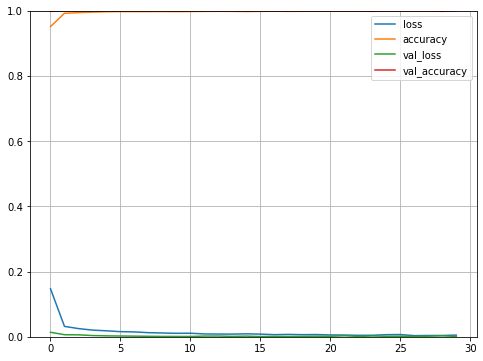

In [97]:
# Plotting Trained dataset at each epoch
pd.DataFrame(history.history).plot (figsize = (8, 6))
plt.gca().set_ylim (0, 1)
plt.grid (True)
plt.show()


In [98]:
# Accuracy of DNN
y_pred = model.predict (x_test_s)
predictions = []
for num in y_pred:
    predictions.append (int (np.round (num, 1)))
print ("Accuracy Score of Deep Neural Network (DNN): {}%".format (round (accuracy_score (le_test_y, predictions) * 100, 2)))

Accuracy Score of Deep Neural Network (DNN): 99.23%


# Predicting Wine Quality
we are to predict Quality Label (high, medium or low)

## Splitting and Scaling The Dataset

In [99]:
# Defining my Dependent (x) and Independent (y) columns
x = wines_df.iloc[:, : -3]        #all columns except wine_type, quality and quality_label
y = wines_df["quality_label"]

# Splitting Dataset using train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.7, random_state = 42)
print ("y_train: {} \ny_test: {}".format (Counter (y_train), Counter(y_test)))

# Scaling Dataset
scaler = StandardScaler ()
x_train_s = scaler.fit_transform (x_train)
x_test_s = scaler.transform (x_test)

y_train: Counter({'medium': 2737, 'low': 1666, 'high': 144}) 
y_test: Counter({'medium': 1178, 'low': 718, 'high': 54})


# Modeling
since we are dealing with a classification Problem we are going to use Classification algorithm. we will use different classification algorithm and then choose the one with the highest accuracy.

## DecisionTreeClassifier

In [106]:
# importing required model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Training the model
dic = {"min_samples_leaf": [5, 8, 15, 10, 20], "max_depth": [2, 3, 4, 5]}
model = DecisionTreeClassifier ()
grid = GridSearchCV (model, dic, n_jobs = -1, cv = 5, scoring = "accuracy")
grid.fit (x_train_s, y_train)
best_model = grid.best_estimator_

# Accuracy of model
y_pred = best_model.predict (x_test_s)
print ("Best Parameters are: {}\n".format (grid.best_params_))
print ("Accuracy score of DecisionTreeClassifier: {}%".format (round (accuracy_score (y_test, y_pred), 2) * 100))

Best Parameters are: {'max_depth': 5, 'min_samples_leaf': 10}

Accuracy score of DecisionTreeClassifier: 72.0%


# Ensemble methods
## Random forest classifier (Bagging methods)

In [114]:
# importing required model
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier
model = RandomForestClassifier ()
dic = {"n_estimators": [100, 200, 300], "max_depth": [5, 6, 8, 10, 15],
       "max_features": ["auto", "None", "log2"]}
grid = GridSearchCV (model, dic, cv = 5, n_jobs = -1, scoring = "accuracy")
grid.fit (x_train_s, y_train)
best_model = grid.best_estimator_

# Accuracy of model
y_pred = best_model.predict (x_test_s)
print ("Best Parameters are: {}\n".format (grid.best_params_))
print ("Accuracy score of RandomForestClassifier: {}%".format (round (accuracy_score (y_test, y_pred), 2) * 100))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\USER\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\USER\anaconda3\lib\site-packages\joblib

Best Parameters are: {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 200}

Accuracy score of RandomForestClassifier: 80.0%
